In [6]:
import strava_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [7]:
activities = strava_utils.get_activities()
df = strava_utils.activities_to_df(activities)

run_df = df[df['type'] == 'Run']
run_df = strava_utils.fill_missing_dates(run_df)

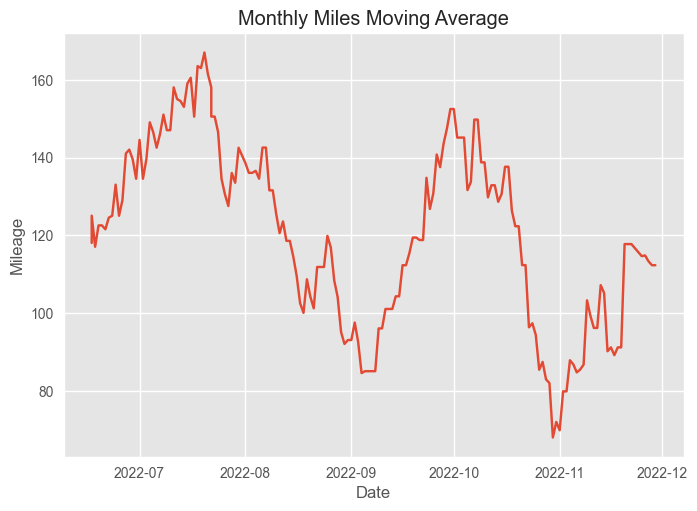

In [8]:
run_df['distance'] = run_df['distance'].apply(lambda x: 0 if np.isnan(x) else x)
run_df['distance_ma'] = run_df['distance'].rolling(30).sum()

plt.plot(run_df.index, run_df['distance_ma'])
plt.title('Monthly Miles Moving Average')
plt.xlabel('Date')
plt.ylabel('Mileage')
plt.show()